<a href="https://colab.research.google.com/github/wldopie/ESAA/blob/main/HW_220930.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chap 9. 비지도 학습 (pg.299 ~ 345)**
  - 군집(clustering)
    - 비슷한 샘플을 클러스터로 모은다. 군집은 데이터 분석, 고객 분류, 추천 시스템, 검색 엔진, 이미지 분할, 준지도 학습, 차원 축소 등에 사용할 수 있다.
  - 이상치 탐지(outlier detection)
    - '정상' 데이터가 어떻게 보이는지를 학습한다. 그다음 비정상 샘플을 감지하는 데 사용한다. 
  - 밀도 추정(density estimation)
    - 데이터셋 생성 확률 과정(random process)의 확률 밀도 함수(probability density function)를 추정한다. 밀도 추정은 이상치 탐지에 널리 사용된다. 밀도가 매우 낮은 영역에 놓인 샘플이 이상치일 가능성이 높다. 또한 데이터 분석과 시각화에도 유용하다.
---

## **9.1 군집**
  - 군집(clustering)
    - 비슷한 샘플을 구별해 하나의 클러스터(cluster) 또는 비슷한 샘플의 그룹으로 할당하는 작업

  - 분류 알고리즘
    - 데이터셋에 레이블이 존재하는 경우
    - 로지스틱 회귀, SVM, 랜덤 포레스트 분류기 같은 알고리즘을 활용

  - 군집 알고리즘
    - 데이터셋에 레이블이 존재하지 않는 경우
    - k-평균, DBSCAN, 가우시안 혼합 모델과 같은 알고리즘을 활용

- 군집 알고리즘이 적용되는 사례
    1. `고객 분류`
      - 고객을 `구매 이력이나 웹사이트 내 행동 등을 기반으로 클러스터`로 모을 수 있다.이는 고객이 누구인지, 고객이 무엇을 원하는지 이해하는 데 도움이 된다. 고객 그룹마다 제품 추천이나 마케팅 전략을 다르게 적용할 수 있다. 예를 들어 동일한 클러스터 내의 사용자가 좋아하는 컨텐츠를 추천하는 `추천 시스템`을 만들 수 있다.
    
    2. `데이터 분석`
      - 새로운 데이터셋을 분석할 때 군집 알고리즘을 실행하고 각 클러스터를 따로 분석하면 도움이 된다.

    3. `차원 축소 기법`
      - 한 데이터셋에 군집 알고리즘을 적용하면 각 클러스터에 대한 샘플의 친화성(affinity)을 측정할 수 있다. (친화성은 샘플이 클러스터에 얼마나 잘 맞는지를 측정하는 것)
      - k개의 클러스터가 있다면 이 벡터는 k차원이 된다. 이 벡터는 일반적으로 원본 특성 벡터보다 훨씬 저차원이다. 하지만 이후 분석을 위한 충분한 정보를 가질 수 있다.

    4. `이상치 탐지`
      - `모든 클러스터에 대해 친화성이 낮은 샘플`은 이상치일 가능성이 높다. 
      - 웹사이트 내 행동을 기반으로 사용자의 클러스터를 만들었다면, 초당 웹서버 요청을 비정상적으로 많이 하는 사용자를 감지할 수 있다.
      - 이상치 탐지는 특히 제조 분야에서 `결함을 감지`할 때 유용하다. 또는 `부정 거래 감지(fraud detection)`에 활용된다.

    5. `준지도 학습`
      - 레이블된 샘플이 적다면 군집을 수행하고 동일한 클러스터에 있는 모든 샘플에 레이블을 전파할 수 있다. 이 기법은 이어지는 지도 학습 알고리즘에 필요한 레이블이 크게 증가해 성능을 크게 향상한다.

    6. `검색 엔진`
      - 일부 검색 엔진은 제시된 이미지와 비슷한 이미지를 찾아준다. 이런 시스템을 구축하려면 먼저 데이터베이스에 있는 모든 이미지에 군집 알고리즘을 적용해야 한다. 비슷한 이미지는 동일한 클러스터에 속한다. 사용자가 찾으려는 이미지를 제공하면 훈련된 군집 모델을 사용해 이미지의 클러스터를 찾는다. 그다음 이 클러스터의 모든 이미지를 반환한다.

    7. `이미지 분할`
      - 색을 기반으로 픽셀을 클러스터로 모은다. 그다음 각 픽셀의 색을 해당 클러스터의 평균 색으로 바꾼다. 이는 이미지에 있는 색상의 종류를 크게 줄인다. 이렇게 하면 물체의 윤곽을 감지하기 쉬워져 물체 탐지 및 추적 시스템에서 이미지 분할을 많이 활용한다.

### **9.1.1 k-평균**

  - `k-평균`
    - 각 `클러스터의 중심`을 찾고, 가장 `가까운 클러스터에 샘플을 할당`하는 알고리즘
  - 샘플 덩어리 다섯 개로 이루어진 레이블 없는 데이터셋에 k-평균 알고리즘을 훈련시켜보자.

In [1]:
# 데이터셋 만들기
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
blob_centers = np.array(
    [[0.2, 2.3],
     [-1.5, 2.3],
     [-2.8, 1.8],
     [-2.8, 2.8],
     [-2.8, 1.3]])

blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])

In [3]:
X, y = make_blobs(n_samples = 2000, centers = blob_centers,
                  cluster_std = blob_std, random_state = 7)

In [4]:
# 생성한 2000개의 데이터를 그래프로 나타내기
def plot_clusters(X, y = None):
  plt.scatter(X[:, 0], X[:, 1], c = y, s = 1)
  plt.xlabel('$x_1$', fontsize = 14)
  plt.ylabel('$x_2$', fontsize = 14, rotation = 0)

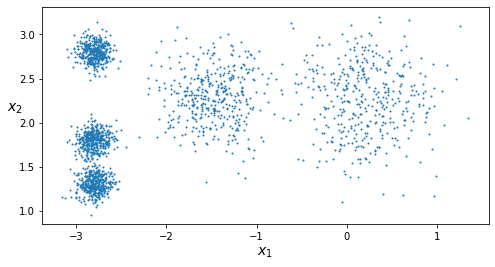

In [5]:
plt.figure(figsize = (8, 4))
plot_clusters(X)
plt.show()

In [6]:
# k-평균 알고리즘 훈련
from sklearn.cluster import KMeans
k = 5
kmeans = KMeans(n_clusters = k)
y_pred = kmeans.fit_predict(X)

  - 각 샘플은 5개의 클러스터 중 하나에 할당된다.
  - 군집에서 각 샘플의 레이블은, 알고리즘이 샘플에 할당한 클러스터의 인덱스이다. 즉, 해당 샘플이 몇 번째 클러스터에 속하는지를 알려준다.

In [7]:
y_pred

array([4, 0, 1, ..., 3, 1, 0], dtype=int32)

In [8]:
y_pred is kmeans.labels_

True

  - 해당 알고리즘이 찾은 5개의 센트로이드(centroid)도 확인할 수 있다.

In [9]:
kmeans.cluster_centers_

array([[-2.80389616,  1.80117999],
       [ 0.20876306,  2.25551336],
       [-1.46679593,  2.28585348],
       [-2.79290307,  2.79641063],
       [-2.80037642,  1.30082566]])

  - 새로운 샘플에 가장 가까운 센트로이드의 클러스터를 할당할 수도 있다.

In [10]:
X_new = np.array([[0, 2], [3, 2], [-3, 3], [-3, 2.5]])
kmeans.predict(X_new)

array([1, 1, 3, 3], dtype=int32)

  - 클러스터의 결정 경계를 그려보면 보로노이 다이어그램을 얻을 수 있다. (센트로이드는 x로 표시되어 있다.)

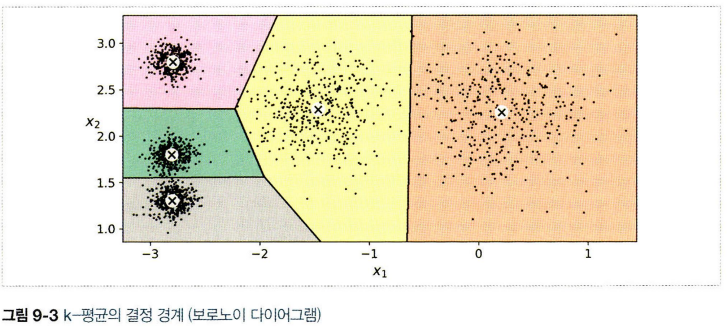

  - 대부분의 샘플이 적절한 클러스터에 잘 할당되었으나, 샘플 몇 개는 레이블이 잘못 부여되었다.
  - 실제 k-평균 알고리즘은 클러스터의 크기가 많이 다르면 잘 작동하지 않는다. 샘플을 클러스터에 할당할 때 센트로이드까지 거리를 고려하는 것이 전부이기 때문이다.

  - 이를 해결하기 위해 소프트 군집을 사용할 수 있다. 
    - `소프트 군집`이란, 샘플을 하나의 클러스터에 할당하는 하드 군집이 아닌 `클러스터마다 샘플에 점수를 부여`하는 것이다.
  - `KMeans` 클래스의 `transform()` 메서드는 `샘플과 각 센트로이드 사이의 거리를 반환`한다.

In [11]:
kmeans.transform(X_new)

array([[2.81093633, 0.32995317, 1.49439034, 2.9042344 , 2.88633901],
       [5.80730058, 2.80290755, 4.4759332 , 5.84739223, 5.84236351],
       [1.21475352, 3.29399768, 1.69136631, 0.29040966, 1.71086031],
       [0.72581411, 3.21806371, 1.54808703, 0.36159148, 1.21567622]])

##### **k-평균 알고리즘**
  1. 처음에는 센트로이드를 랜덤하게 선정한다. (예를 들어 무작위로 k개의 샘플을 뽑아 그 위치를 센트로이드로 정한다.)
  2. 그다음 샘플에 레이블을 할당하고 센트로이드를 업데이트하고, 샘플에 레이블을 할당하고 센트로이드를 업데이트하는 식으로 센트로이드에 변화가 없을 때까지 계속한다.
  - 해당 알고리즘은 수렴하는 것이 보장되지만, 적절한 솔루션으로 수렴하지 못할 수 있다.
  - 이 여부는 센트로이드 초기화에 달려 있다.
  - 센트로이드 초기화를 개선하여 이런 위험을 줄일 수 있는 방법을 알아보자.

##### **센트로이드 초기화 방법**
  1. init 매개변수에 센트로이드 리스트를 담은 넘파이 배열을 지정하고, n_init = 1로 설정한다.
  2. 랜덤 초기화를 다르게 하여 여러 번 알고리즘을 실행하고, 가장 좋은 솔루션을 선택한다. 이때, 랜덤 초기화 횟수는 n_init 매개변수로 조절한다.
    - 이는 fit() 메서드를 호출할 때 앞서 설명한 전체 알고리즘이 10번 실행된다는 뜻이다.
    - 최선의 솔루션을 알기 위해 사용하는 성능 지표는 바로 이너셔(inertia)이다. 
      - 이너셔 : 각 샘플과 가장 가까운 센트로이드 사이의 평균 제곱 거리 
    - KMeans 클래스는 알고리즘을 n_init번 실행하여 이너셔가 가장 낮은 모델을 반환한다.

In [12]:
# 첫 번째 방법
good_init = np.array([[-3, 3], [-3, 2], [-3, 1], [-1, 2], [0, 2]])
kmeans = KMeans(n_clusters = 5, init = good_init, n_init = 1)

In [13]:
# 두 번째 방법 - X에 대해 훈련시킨 뒤, inertia_를 호출해야 오류없이 작동
kmeans.fit(X)
kmeans.inertia_

211.5985372581684

In [14]:
kmeans.score(X)

-211.59853725816836

  - k-평균++ 알고리즘
    - k-평균 알고리즘을 향상
    - 다른 센트로이드와 거리가 먼 센트로이드를 선택하는 초기화 단계를 소개
    - 이는 k-평균 알고리즘이 최적이 아닌 솔루션으로 수렴할 가능성을 크게 낮춘다.
  
  - 구체적인 알고리즘
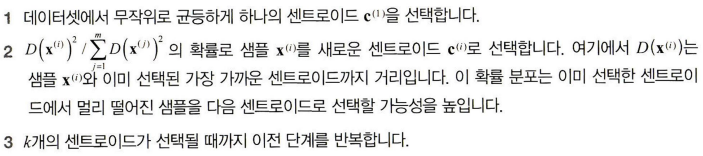

##### **k-평균 속도 개선과 미니배치 k-평균**
  1. `k-평균 속도 개선`
    - `불필요한 거리 계산을 많이 피함`으로써 알고리즘의 속도를 상당히 높일 수 있다.
    - 샘플과 센트로이드 사이의 거리를 위한 하한선과 상한선을 유지한다.

  2. `미니배치 k-평균`
    - 전체 데이터셋을 사용하는 대신, 각 반복마다 `미니배치를 활용해 센트로이드를 조금씩 이동`한다.
    - 이는 일반적으로 알고리즘의 속도를 3배에서 4배 정도 높인다.
    - 또한 메모리에 들어가지 않는 대량의 데이터셋에 군집 알고리즘을 적용할 수 있다.
    - 사이킷런의 `MiniBatchKMeans` 클래스에 이 알고리즘이 구현되어 있다.

In [15]:
from sklearn.cluster import MiniBatchKMeans

minibatch_kmeans = MiniBatchKMeans(n_clusters = 5)
minibatch_kmeans.fit(X)

MiniBatchKMeans(n_clusters=5)

  - 미니배치 k-평균 알고리즘의 경우 일반 k-평균 알고리즘보다 훨씬 빠르지만 이너셔는 일반적으로 조금 더 나쁘다. 특히 클러스터의 개수가 증가할 때 그렇다.
  

##### **최적의 클러스터 개수 찾기**
  - 가장 작은 이너셔를 가진 모델을 선택한다고 해서 항상 최적의 클러스터 개수를 찾을 수 있는 것은 아니다.
  - 이너셔는 k가 증가함에 따라 점점 작아지기 때문에, k를 선택할 때 그리 좋은 성능 지표가 아니다.
  - 실제로 클러스터가 늘어날수록 각 샘플은 가까운 센트로이드에 더 가깝게 된다. 이너셔를 k의 함수로 그래프를 그려보면 아래와 같다.

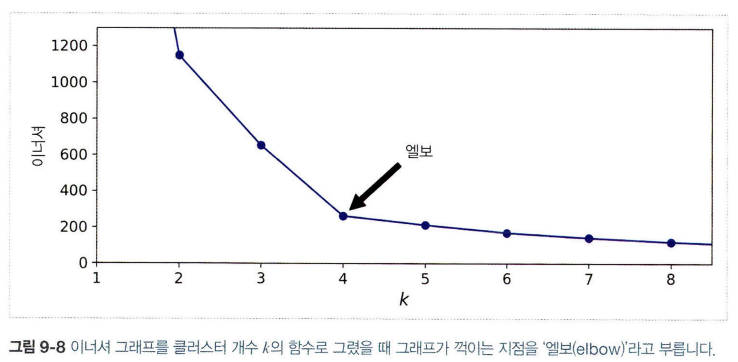

  - 그림에서 보듯이 이너셔는 k가 4까지 증가할 때 빠르게 줄어든다. 
  - 그러다 k가 계속 증가하면 이너셔는 훨씬 느리게 감소한다.
  - 위의 그래프를 팔의 형태와 비슷하게 보면 k=4 지점이 엘보(elbow)이므로, k에 대한 정답을 모를 경우 4는 좋은 선택이 된다. 

  - 가장 작은 이너셔를 선택하는 것보다 더 `정확한 방법`은 `실루엣 점수를 확인`하는 것이다.
    - `실루엣 점수`(silhouette score)
      - 모든 샘플에 대한 `실루엣 계수의 평균`

    - `실루엣 계수`(silhouette coefficient)
      - (b-a) / max(a,b)
      - a는 동일한 클러스터에 있는 다른 샘플까지의 평균 거리이다. (즉, 클러스터 내부의 평균 거리)
      - b는 가장 가까운 클러스터까지 평균 거리이다. (즉, 가장 가까운 클러스터의 샘플까지 평균 거리)
      - 실루엣 계수는 `-1에서 +1`까지 바뀔 수 있으며, `+1에 가까울수록` `자신의 클러스터 안에 잘 속해 있고 다른 클러스터와는 멀리 떨어져 있다`는 뜻이다.
      - `0에 가까우면 클러스터의 경계`에, `-1에 가까우면` 이 샘플이 `잘못된 클러스터에 할당되었다는 의미`이다.

    - 사이킷런의 `silhouette_score()` 함수를 이용해 실루엣 점수를 계산할 수 있다.    

In [16]:
from sklearn.metrics import silhouette_score
silhouette_score(X, kmeans.labels_)

0.655517642572828

  - 클러스터의 개수를 달리하여 실루엣 점수를 비교해보자.

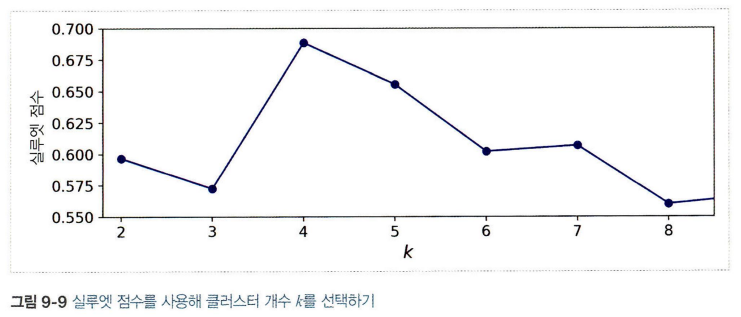

  - k=4가 좋은 선택이지만 k=5도 꽤 좋다는 것을 위의 그래프를 통해 알 수 있다.

  - `실루엣 다이어그램`(silhouette diagram)
    - 모든 샘플의 실루엣 계수를 할당된 클러스터와 계숫값으로 정렬하여 그리면 더 많은 정보가 있는 그래프를 얻을 수 있다.
    - `그래프의 높이`는 `클러스터가 포함하고 있는 샘플의 개수`를 의미한다.
    - `그래프의 너비`는 이 `클러스터에 포함된 샘플의 정렬된 실루엣 계수`를 나타낸다.(넓을수록 좋다.)

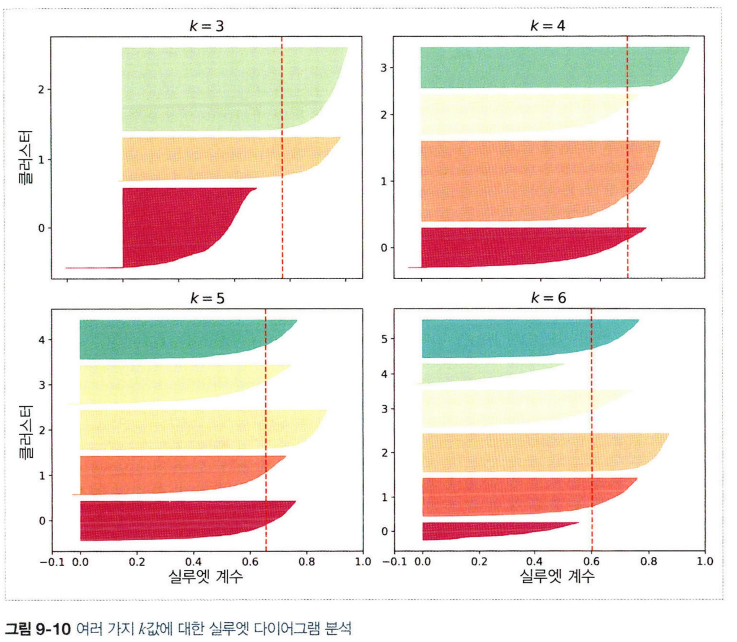

  - k=3, k=6
    - 한 클러스터의 샘플 대부분이 수직 파선보다 낮은 계수를 가지면 클러스터의 샘플이 다른 클러스터랑 너무 가깝다는 것을 의미하므로, 나쁜 클러스터이다.
  - k=4, k=5
    - 대부분의 샘플이 파선을 넘어서 뻗어 있고, 실루엣 계수도 1.0에 가깝다. 
    - k=5일 때 모든 클러스터가 균일하게 분포하고 있으므로, k=4에서 전반적인 실루엣 점수가 조금 더 높더라도 비슷한 크기의 클러스터를 얻을 수 있는 k=5를 선택하는 것이 좋다.

### **9.1.2 k-평균의 한계**
  1. 클러스터의 개수를 직접 지정해야 한다.
  2. 클러스터의 크기나 밀집도가 서로 다르거나 원형이 아닐 경우 잘 작동하지 않는다.

### **9.1.3 군집을 사용한 이미지 분할**
  - 이미지 분할(image segmentation)
    - 이미지를 세그먼트 여러 개로 분할하는 작업
  
  - 시맨틱 분할(semantic segmentation)
    - 동일한 종류의 물체에 속한 모든 픽셀은 같은 세그먼트에 할당

  - 색상 분할(color segmentation)
    - 동일한 색상을 가진 픽셀을 같은 세그먼트에 할당

In [17]:
from matplotlib.image import imread
import os

image = imread('/content/drive/MyDrive/ladybug.png')
image.shape

(533, 800, 3)

  - 다음 코드를 이용해 이 배열을 RGB 색상의 긴 리스트로 변환한 다음, k-평균을 사용해 이 색상을 클러스터로 모은다.

In [18]:
X = image.reshape(-1, 3)
kmeans = KMeans(n_clusters = 8).fit(X)
segmented_img = kmeans.cluster_centers_[kmeans.labels_]
segmented_img = segmented_img.reshape(image.shape)

### **9.1.4 군집을 활용한 전처리**
  - `군집`은 `차원 축소에 효과적`인 방법이다.
  - 특히 `지도 학습 알고리즘을 적용하기 전`에 `전처리 단계`로 사용할 수 있다.
  - 차원 축소에 군집을 사용하는 예를 알아보기 위해 숫자 데이터셋을 불러온다.

In [19]:
from sklearn.datasets import load_digits

X_digits, y_digits = load_digits(return_X_y = True)

  - 이제 훈련 세트와 테스트 세트로 나눈다.

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_digits, y_digits, random_state = 42)

  - 그다음 로지스틱 회귀 모델을 훈련한다.

In [21]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', max_iter = 5000,
                             random_state = 42)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=5000, multi_class='ovr', random_state=42)

  - 테스트 세트에서 정확도를 평가한다.

In [22]:
log_reg.score(X_test, y_test)

0.9688888888888889

  - 기준값으로 96.8%의 정확도를 얻었다.
  - k-평균을 전처리 단계로 사용할 경우, 더 좋은 결과를 얻을 수 있을지 확인해보자.
  - 먼저 훈련 세트를 50개의 클러스터로 모은 다음, 이미지를 50개의 클러스터까지 거리로 바꾼다. 그다음 로지스틱 회귀 모델을 적용한다.

In [23]:
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('kmeans', KMeans(n_clusters = 50, random_state = 42)),
    ('log_reg', LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', max_iter = 5000, random_state = 42)),
])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('kmeans', KMeans(n_clusters=50, random_state=42)),
                ('log_reg',
                 LogisticRegression(max_iter=5000, multi_class='ovr',
                                    random_state=42))])

In [24]:
pipeline.score(X_test, y_test)

0.9777777777777777

  - 가장 좋은 k값은 교차 검증에서 가장 좋은 분류 성능을 내는 값이다. 
  - `GridSearchCV`를 사용해 최적의 클러스터 개수를 찾아보자.

In [25]:
from sklearn.model_selection import GridSearchCV

param_grid = dict(kmeans__n_clusters = range(2, 100))
grid_clf = GridSearchCV(pipeline, param_grid, cv = 3, verbose = 2)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 98 candidates, totalling 294 fits
[CV] END ...............................kmeans__n_clusters=2; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=2; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=3; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.3s
[CV] END ...............................kmeans__n_clusters=4; total time=   0.4s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.5s
[CV] END ...............................kmeans__n_clusters=5; total time=   0.6s
[CV] END ...............................kmeans_

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


[CV] END ..............................kmeans__n_clusters=55; total time=   8.6s
[CV] END ..............................kmeans__n_clusters=56; total time=   7.0s
[CV] END ..............................kmeans__n_clusters=56; total time=   7.0s
[CV] END ..............................kmeans__n_clusters=56; total time=   7.2s
[CV] END ..............................kmeans__n_clusters=57; total time=   7.0s
[CV] END ..............................kmeans__n_clusters=57; total time=   7.9s
[CV] END ..............................kmeans__n_clusters=57; total time=   6.5s
[CV] END ..............................kmeans__n_clusters=58; total time=   7.8s
[CV] END ..............................kmeans__n_clusters=58; total time=   8.0s
[CV] END ..............................kmeans__n_clusters=58; total time=   7.4s
[CV] END ..............................kmeans__n_clusters=59; total time=   7.2s
[CV] END ..............................kmeans__n_clusters=59; total time=  12.2s
[CV] END ...................

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kmeans',
                                        KMeans(n_clusters=50, random_state=42)),
                                       ('log_reg',
                                        LogisticRegression(max_iter=5000,
                                                           multi_class='ovr',
                                                           random_state=42))]),
             param_grid={'kmeans__n_clusters': range(2, 100)}, verbose=2)

  - 최선의 k값과 이때 파이프라인의 성능을 확인해보자.

In [26]:
grid_clf.best_params_

{'kmeans__n_clusters': 95}

In [27]:
grid_clf.score(X_test, y_test)

0.9777777777777777

### **9.1.5 군집을 활용한 준지도 학습 - 결과가 이상하다...**
  - 군집을 사용하는 또 다른 사례는 준지도 학습이다.
  - 레이블이 없는 데이터가 많고 레이블이 있는 데이터가 적을 때 사용한다.
  - 숫자 데이터셋에서 레이블된 50개 샘플에 로지스틱 회귀 모델을 훈련해보자.

In [28]:
n_labeled = 50
log_reg = LogisticRegression(multi_class = 'ovr', solver = 'lbfgs', random_state = 42)
log_reg.fit(X_train[:n_labeled], y_train[:n_labeled])

LogisticRegression(multi_class='ovr', random_state=42)

In [29]:
log_reg.score(X_test, y_test)

0.8333333333333334

  - 정확도가 83%로 낮다. 
  - 이를 개선하기 위한 방법을 알아보자.
    - 먼저 훈련 세트를 50개의 클러스터로 모은다.
    - 그다음 `각 클러스터에서 센트로이드에 가장 가까운 이미지`를 찾는다. 이런 이미지를 `대표 이미지`라고 부른다.

In [30]:
k = 50
kmeans = KMeans(n_clusters = k)
X_digits_dist = kmeans.fit_transform(X_train)
representative_digit_idx = np.argmin(X_digits_dist, axis = 0)
X_representative_digits = X_train[representative_digit_idx]

  - 대표 이미지 50개를 보고 수동으로 레이블을 할당해보자.

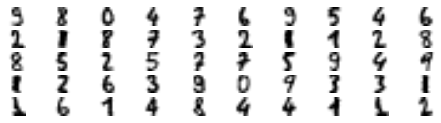

In [31]:
# 대표 이미지 50개 확인
plt.figure(figsize=(8, 2))
for index, X_representative_digit in enumerate(X_representative_digits):
    plt.subplot(k // 10, 10, index + 1)
    plt.imshow(X_representative_digit.reshape(8, 8), cmap="binary", interpolation="bilinear")
    plt.axis('off')

plt.show()

In [51]:
y_representative_digits = np.array([9, 8, 0, 4, 7, 6, 9, 5, 4, 6,
                                    2, 1, 8, 7, 3, 2, 1, 1, 2, 8,
                                    8, 5, 2, 5, 7, 7, 5, 9, 4, 9,
                                    1, 2, 6, 3, 9, 0, 9, 3, 3, 1,
                                    1, 6, 1, 4, 8, 4, 4, 1, 1, 2])

  - 레이블된 50개 샘플로 이루어진 데이터셋이 준비되었다. 해당 이미지들은 각 클러스터를 대표하는 이미지이다.

In [52]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_representative_digits, y_representative_digits)
log_reg.score(X_test, y_test)

0.9044444444444445

  - 50개의 샘플로 모델을 훈련했을 뿐인데 83.3%에서 90.4%로 정확도가 훨씬 상승했다.

  - 레이블 전파
    - 레이블을 동일한 클러스터에 있는 모든 샘플로 전파하는 것

In [53]:
y_train_propagated = np.empty(len(X_train), dtype = np.int32)
for i in range(k):
  y_train_propagated[kmeans.labels_ == i] = y_representative_digits[i]

  - 이제 모델을 다시 훈련하고 성능을 확인해보자.

In [54]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train, y_train_propagated)
log_reg.score(X_test, y_test)

0.9377777777777778

  - 성능이 어느 정도 올라가긴 했지만, 문제는 `각 대표 샘플의 레이블을 동일한 클러스터의 모든 샘플에 전파`했다는 것이다. 
  - 여기에는 클러스터 경계에 가깝게 위치한 샘플이 포함되어 있기 때문에 아마 잘못된 레이블이 부여되었을 것이다.
  - 따라서, `센트로이드와 가까운 샘플의 20%에만 레이블을 전파`해보고 어떻게 되는지 확인해보자.

In [57]:
percentile_closest = 20

X_cluster_dist = X_digits_dist[np.arange(len(X_train)), kmeans.labels_]
for i in range(k):
  in_cluster = (kmeans.labels_ == i)
  cluster_dist = X_cluster_dist[in_cluster]
  cutoff_distance = np.percentile(cluster_dist, percentile_closest)
  above_cutoff = (X_cluster_dist > cutoff_distance)
  X_cluster_dist[in_cluster & above_cutoff] = -1

partially_propagated = (X_cluster_dist != -1)
X_train_partially_propagated = X_train[partially_propagated]
y_train_partially_propagated = y_train_propagated[partially_propagated]

  - 이제 부분적으로 전파한 이 데이터셋에 모델을 다시 훈련해보자.

In [58]:
log_reg = LogisticRegression(multi_class="ovr", solver="lbfgs", max_iter=5000, random_state=42)
log_reg.fit(X_train_partially_propagated, y_train_partially_propagated)
log_reg.score(X_test, y_test)

0.9155555555555556

  - 레이블이 있는 전체 데이터셋에서 훈련한 로지스틱 회귀 성능에 매우 가깝다.
  - 성능이 이렇게 좋은 이유는 전파된 레이블이 실제로 매우 좋기 때문이다.

In [59]:
np.mean(y_train_partially_propagated == y_train[partially_propagated])

1.0

  - `능동 학습` (active learning)
    - `불확실성 샘플링`
      1. 지금까지 수집한 레이블된 샘플에서 모델을 훈련하고, 이 모델을 사용해 레이블되지 않은 모든 샘플에 대한 예측을 만든다.
      2. 모델이 가장 불확실하게 예측한 샘플(즉, 추정 확률이 낮은 샘플)을 전문가에게 보내 레이블을 붙인다.
      3. 레이블을 부여하는 노력만큼의 성능이 향상되지 않을 때까지 이를 반복한다.

    - 다른 전략은 모델을 가장 크게 바꾸는 샘플이나 모델의 검증 점수를 가장 크게 떨어뜨리는 샘플, 여러 개의 모델이 동일한 예측을 내지 않는 샘플에 대해 레이블을 요청하는 것이다.  
    

### **9.1.6 DBSCAN**
  - 해당 알고리즘은 `밀집된 연속적 지역을 클러스터로 정의`한다.

  - 작동 방식
    - 알고리즘이 각 샘플에서 작은 거리인 ϵ 내에 샘플이 몇 개 놓여 있는지 센다.이 지역을 샘플의 ϵ-이웃이라고 부른다.
    - ϵ-이웃 내에 적어도 min_samples개의 샘플이 있다면, 이를 핵심 샘플로 간주한다. 즉, 핵심 샘플은 밀집된 지역에 있는 샘플이다.
    - 핵심 샘플의 이웃에 있는 모든 샘플은 동일한 클러스터에 속한다. 이웃에는 다른 핵심 샘플이 포함될 수 있다. 따라서 핵심 샘플의 이웃의 이웃은 계속해서 하나의 클러스터를 형성한다.
    - 핵심 샘플이 아니고 이웃도 아닌 샘플은 이상치로 판단한다.

  - 해당 알고리즘은 `모든 클러스터가 충분히 밀집`되어 있고, `밀집되지 않은 지역과 잘 구분될 때 좋은 성능`을 나타낸다.

  - 사이킷런의 `DBSCAN` 클래스를 활용해 이를 구현할 수 있다.


In [60]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_moons

X, y = make_moons(n_samples = 1000, noise = 0.05)
dbscan = DBSCAN(eps = 0.05, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.05)

  - 모든 샘플의 레이블은 labels_에 저장되어 있다.

In [61]:
dbscan.labels_

array([-1,  0,  0,  1,  2, -1,  2,  0,  0,  0,  1,  2,  3,  0,  0,  0,  1,
        4,  1, -1,  0,  1,  1,  0,  2,  0,  2,  0,  1,  0,  0,  1,  0,  1,
        3,  0,  0,  0,  0,  0,  1,  5,  0,  5,  1,  1,  0,  1,  0,  0,  0,
        1,  0, -1,  1,  0,  0,  1,  0,  4,  0,  1,  0,  4,  1,  1,  0,  0,
        3,  0,  1,  1,  0, -1,  1,  1,  1,  1,  0, -1, -1, -1,  0,  0,  6,
        0,  0,  1,  0,  2,  0,  4,  1,  0,  1,  0,  4, -1,  1,  1,  0,  0,
        0,  0,  0,  3,  0,  6,  4,  0,  0,  1,  0,  0,  0,  2,  0,  5,  2,
       -1,  0,  2,  5,  1, -1,  0,  1,  1,  2,  1,  2,  4,  0,  7,  1,  0,
       -1,  1,  2,  0,  1,  0,  0,  0,  0,  1,  0,  1,  1,  1,  2,  1,  0,
        6,  0,  1,  2,  0,  0,  1,  1,  0,  2, -1,  2,  0,  5,  4, -1,  1,
        2, -1,  1,  4,  5,  1,  0,  1,  2,  0,  4,  0,  0,  1,  0,  1,  1,
        1,  1,  1,  7, -1,  0,  0,  4,  2,  1, -1,  6,  0,  4,  0,  0,  3,
       -1,  1,  0,  0, -1,  2,  0,  1, -1,  1,  0,  4,  0,  1,  0, -1,  0,
        0, -1, -1,  0,  1

  - 일부 샘플의 `클러스터 인덱스는 -1`인데, 이는 알고리즘이 이 샘플을 `이상치로 판단했다는 의미`이다.
  - `핵심 샘플의 인덱스`는 `core_sample_indices_`에서 확인할 수 있으며, `핵심 샘플` 자체는 `components_`에 저장되어 있다.

In [62]:
len(dbscan.core_sample_indices_)

788

In [63]:
dbscan.core_sample_indices_

array([  2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,
        16,  17,  18,  20,  21,  22,  23,  24,  25,  27,  28,  30,  31,
        33,  34,  35,  36,  37,  38,  39,  42,  43,  44,  45,  46,  47,
        48,  49,  50,  51,  52,  54,  55,  56,  58,  59,  61,  62,  63,
        64,  65,  66,  67,  69,  71,  72,  74,  75,  76,  77,  78,  85,
        87,  88,  89,  90,  91,  93,  94,  95,  96,  98,  99, 100, 101,
       102, 103, 104, 106, 107, 108, 110, 112, 113, 114, 115, 116, 118,
       120, 121, 122, 123, 125, 126, 127, 128, 129, 130, 132, 134, 135,
       137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149,
       151, 152, 153, 154, 155, 156, 157, 159, 160, 161, 162, 164, 165,
       166, 167, 169, 170, 172, 173, 174, 175, 176, 177, 178, 179, 180,
       181, 182, 183, 185, 186, 187, 188, 189, 190, 192, 194, 196, 198,
       199, 200, 201, 202, 203, 205, 206, 207, 209, 210, 211, 213, 214,
       215, 217, 218, 220, 221, 224, 225, 226, 227, 229, 230, 23

In [64]:
dbscan.components_

array([[ 0.07175643,  1.05346571],
       [ 1.98726239,  0.35392852],
       [ 0.04567559,  0.16526172],
       ...,
       [ 1.98201524,  0.2601479 ],
       [-0.40887743,  0.92285893],
       [ 0.25539423,  0.96258687]])

  - 이 군집 결과는 아래의 그림과 같다.

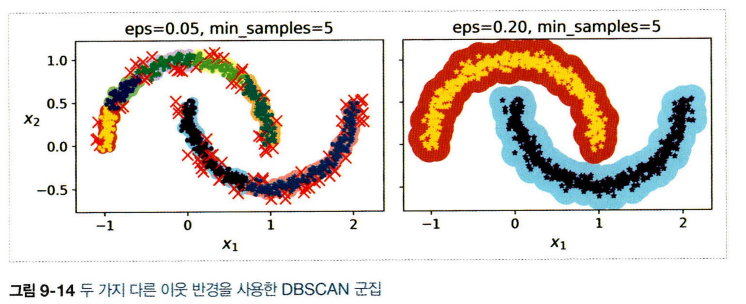

  - `DBSCAN 클래스`는 predict() 메서드를 제공하지 않고 fit_predict() 메서드를 제공한다. 다시 말해 이 알고리즘은 `새로운 샘플에 대해 클러스터를 예측할 수 없다`.
  - 따라서 `사용자가 필요한 예측기를 선택`해야 한다.
  - 예를 들어 `KNeighborsClassifier`를 훈련해보자.

In [65]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 50)
knn.fit(dbscan.components_, dbscan.labels_[dbscan.core_sample_indices_])

KNeighborsClassifier(n_neighbors=50)

  - 이제 샘플 몇 개를 전달하여 어떤 클러스터에 속할 가능성이 높은지 예측하고, 각 클러스터에 대한 확률을 추정해보자.

In [66]:
X_new = np.array([[-0.5, 0], [0, 0.5], [1, -0.1], [2, 1]])
knn.predict(X_new)

array([4, 2, 5, 1])

In [67]:
knn.predict_proba(X_new)

array([[0.02, 0.  , 0.22, 0.  , 0.76, 0.  , 0.  , 0.  ],
       [0.02, 0.  , 0.66, 0.18, 0.  , 0.  , 0.  , 0.14],
       [0.  , 0.34, 0.  , 0.  , 0.  , 0.66, 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

  - 결정 경계가 아래의 그림에 나타나 있다.

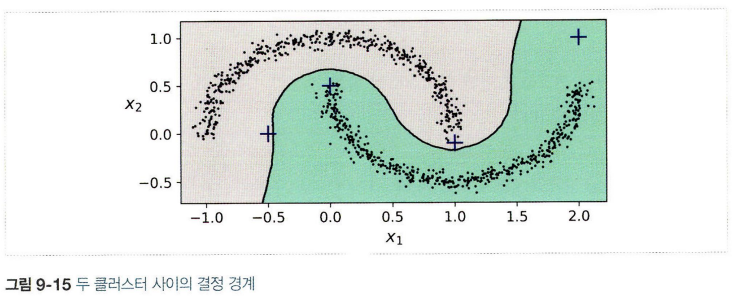

  - 그림에 표시된 덧셈 기호는 X_new에 있는 샘플 네 개를 표시한 것이다.
  - 훈련 세트에 이상치가 없기 때문에 클러스터가 멀리 떨어져 있더라도 분류기는 항상 클러스터 한 개를 선택한다.
  - `최대 거리`를 사용하면, `두 클러스터에서 멀리 떨어진 샘플`을 `이상치로 간단하게 분류`할 수 있다.
  - KNeighborsClassifier의 `kneighbors()` 메서드를 사용한다.
  - 이 메서드에 샘플을 전달하면 훈련 세트에서 가장 가까운 k개 이웃의 거리와 인덱스를 반환한다.

In [68]:
y_dist, y_pred_idx = knn.kneighbors(X_new, n_neighbors = 1)
y_pred = dbscan.labels_[dbscan.core_sample_indices_][y_pred_idx]
y_pred[y_dist > 0.2] = -1
y_pred.ravel()

array([-1,  7,  5, -1])

  - 이처럼 DBSCAN은 매우 간단하지만 강력한 알고리즘이다.
  - 클러스터의 모양과 개수에 상관없이 감지할 수 있는 능력이 있으며, 이상치에 안정적이고 하이퍼파라미터가 eps, min_samples 두 개뿐이다.
  - 하지만 클러스터 간의 밀집도가 크게 다르면 모든 클러스터를 올바르게 잡아내는 것이 불가능하다.

### **9.1.7 다른 군집 알고리즘**

  1. `병합 군집`
    - 반복마다 인접한 클러스터 쌍을 연결하는 방식
    - 대규모 샘플과 클러스터에 잘 확장되며 다양한 형태의 클러스터를 감지

  2. `BIRCH`
    - 대규모 데이터셋을 위해 고안된 알고리즘
    - 특성 개수가 너무 많지 않다면(20개 이하), 배치 k-평균보다 빠르고 비슷한 결과를 만든다.

  3. `평균-이동`
    - 먼저 각 샘플을 중심으로 하는 원을 그린다.
    - 그다음 원마다 안에 포함된 모든 샘플의 평균을 구한 뒤, 원의 중심을 평균점으로 이동시킨다.
    - 모든 원이 움직이지 않을 때까지 평균-이동을 계속한다. 
    - 평균-이동 알고리즘은 지역의 최대 밀도를 찾을 때까지 높은 쪽으로 원을 이동시킨다. 
    - DBSCAN과 유사하게 모양이나 개수에 상관없이 클러스터를 찾을 수 있으며, 하이퍼파라미터 역시 bandwidth 하나로 매우 적다.
    - 그러나 DBSCAN과 달리 평균-이동은 클러스터 내부 밀집도가 불균형할 때 여러 개로 나누는 경향이 있다.
    - 계산 복잡도가 높으므로 대규모 데이터셋에는 적합하지 않다.

  4. `유사도 전파`
    - 샘플은 자신을 대표할 수 있는 비슷한 샘플에 투표한다.
    - 알고리즘이 수렴하면 각 대표와 투표한 샘플이 클러스터를 형성한다.
    - 해당 알고리즘의 경우, 크기가 다른 여러 개의 클러스터를 감지할 수 있다.
    - 계산 복잡도가 높아 대규모 데이터셋에는 적합하지 않다.

  5. `스펙트럼 군집`
    - 샘플 사이의 유사도 행렬을 받아 저차원 임베딩을 만든다.
    - 그다음 이 저차원 공간에서 또 다른 군집 알고리즘을 사용한다.

---

## **9.2 가우시안 혼합**
  - 가우시안 혼합 모델 (GMM)
    - 샘플이 파라미터가 알려지지 않은 여러 개의 혼합된 가우시안 분포에서 생성되었다고 가정하는 확률 모델
    - 하나의 가우시안 분포에서 생성된 모든 샘플은 하나의 클러스터를 형성하며, 일반적으로 이 클러스터는 타원형이다.

  - GaussianMixture 클래스
    - 사전에 가우시안 분포의 개수 k를 알아야 한다.
    - 데이터셋 X가 다음 확률 과정을 통해 생성되었다고 가정해보자.

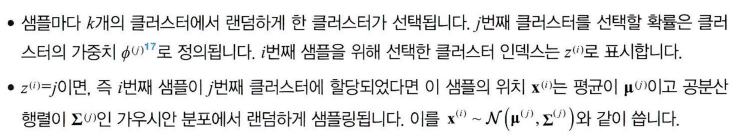

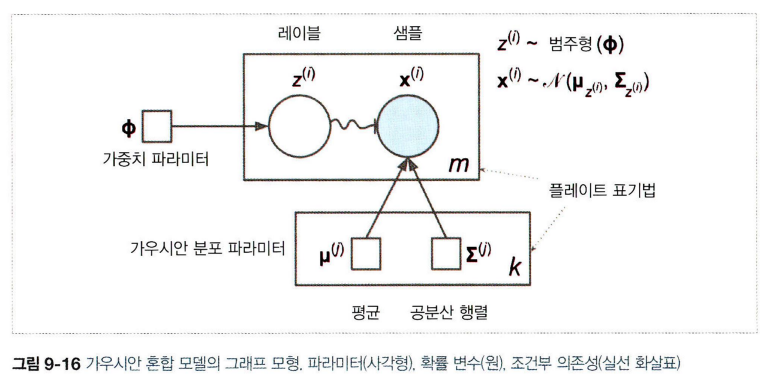

  - 이 모델을 활용해 무엇을 할 수 있을까?
  - 먼저 데이터셋 X가 주어지면 `가중치`와 전체 분포의 파라미터 `μ1에서 μk`까지와 `공분산 행렬 1에서 공분산 행렬 k`까지를 `추정`한다.
  - 사이킷런의 `GaussianMixture` 클래스를 이용해 구현할 수 있다.

In [81]:
# 데이터셋 정의
X1, y1 = make_blobs(n_samples = 1000, centers = ((4, -4), (0, 0)), random_state = 42)
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples = 250, centers = 1, random_state = 42)
X2 = X2 + [6, -8]
X = np.r_[X1, X2]
y = np.r_[y1, y2]

In [82]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components = 3, n_init = 10, random_state = 42)
gm.fit(X)

GaussianMixture(n_components=3, n_init=10, random_state=42)

  - 이 알고리즘이 추정한 파라미터를 확인해보자.

In [83]:
gm.weights_   # 가중치

array([0.39025715, 0.40007391, 0.20966893])

In [84]:
gm.means_     # mu

array([[ 0.05131611,  0.07521837],
       [-1.40763156,  1.42708225],
       [ 3.39893794,  1.05928897]])

In [85]:
gm.covariances_   # covariance

array([[[ 0.68799922,  0.79606357],
        [ 0.79606357,  1.21236106]],

       [[ 0.63479409,  0.72970799],
        [ 0.72970799,  1.1610351 ]],

       [[ 1.14833585, -0.03256179],
        [-0.03256179,  0.95490931]]])

  - 실제 이 데이터를 생성하기 위해 사용한 가중치는 0.2, 0.4, 0.4이므로 잘 작동한 것을 확인할 수 있다.
  - 평균과 공분산 행렬 역시 이 알고리즘이 찾은 것과 매우 유사하다.
  - 해당 클래스는 `기댓값-최대화(EM)` 알고리즘을 사용한다.
    - 먼저 클러스터 파라미터를 랜덤하게 초기화한 뒤, `샘플을 클러스터에 할당`한다. (`기댓값` 단계)
    - 그다음 `클러스터를 업데이트`한다. (`최대화` 단계)
    - EM은 `소프트 클러스터 할당`을 사용한다.


- 알고리즘의 수렴 여부와 반복 횟수를 확인해보자.

In [86]:
gm.converged_

True

In [87]:
gm.n_iter_

4

  - 이제 각 클러스터의 위치, 크기, 모양, 방향, 상대적인 가중치를 예측했다.
  - 이 모델은 새로운 샘플을 가장 비슷한 클러스터에 손쉽게 할당할 수 있다.(하드 군집) 또는 특정 클러스터에 속할 확률을 예측할 수 있다.(소프트 군집)
  - 하드 군집을 위해서는 predict(), 소프트 군집을 위해서는 predict_proba()를 이용한다.

In [88]:
# 하드 군집
gm.predict(X)

array([0, 0, 1, ..., 2, 2, 2])

In [89]:
# 소프트 군집
gm.predict_proba(X)

array([[9.76741808e-01, 6.78581203e-07, 2.32575136e-02],
       [9.82832955e-01, 6.76173663e-04, 1.64908714e-02],
       [7.46494398e-05, 9.99923327e-01, 2.02398402e-06],
       ...,
       [4.26050456e-07, 2.15512941e-26, 9.99999574e-01],
       [5.04987704e-16, 1.48083217e-41, 1.00000000e+00],
       [2.24602826e-15, 8.11457779e-41, 1.00000000e+00]])

  - 가우시안 혼합 모델은 생성 모델이므로, 이 모델에서 새로운 샘플을 만들 수 있다.

In [90]:
X_new, y_new = gm.sample(6)
X_new

array([[-0.86944074, -0.32767626],
       [ 0.29836051,  0.28297011],
       [-2.8014927 , -0.09047309],
       [ 3.98203732,  1.49951491],
       [ 3.81677148,  0.53095244],
       [ 2.84104923, -0.73858639]])

In [91]:
y_new

array([0, 0, 1, 2, 2, 2])

  - 주어진 위치에서 `모델의 밀도를 추정`할 수도 있다. `score_samples()`를 활용한다.
  - 샘플이 주어지면 이 메서드는 그 위치의 `확률 밀도 함수의 로그를 예측`한다.

In [92]:
gm.score_samples(X)

array([-2.60768954, -3.57110232, -3.32987086, ..., -3.51347241,
       -4.39798588, -3.80746532])

  - 이 점수의 지숫값을 계산하면 샘플의 위치에서 pdf 값을 얻을 수 있다. 이때 이 값은 하나의 확률이 아니라 확률 밀도이다.

  - 특성이나 클러스터가 많거나 샘플이 적을 때는 EM이 최적의 솔루션으로 수렴하기 어렵다. 이러한 어려움을 해결하려면 `알고리즘이 학습할 파라미터의 개수를 제한`해야 한다.
  - `클러스터의 모양과 방향의 범위를 제한`하는 것이 한 가지 방법이다.
  - 사이킷런의 `covariance_type` 매개변수에 다음 값 중 하나를 설정한다.
    - `spherical`
      - 모든 클러스터가 원형
    - `diag`
      - 크기에 상관없이 어떠한 타원형도 가능
    - `tied`
      - 모든 클러스터가 동일한 타원 모양, 크기, 방향을 가짐

  - 아래의 그림은 covariance_type을 tied 또는 spherical로 지정했을 때 EM 알고리즘으로 찾은 솔루션이다.

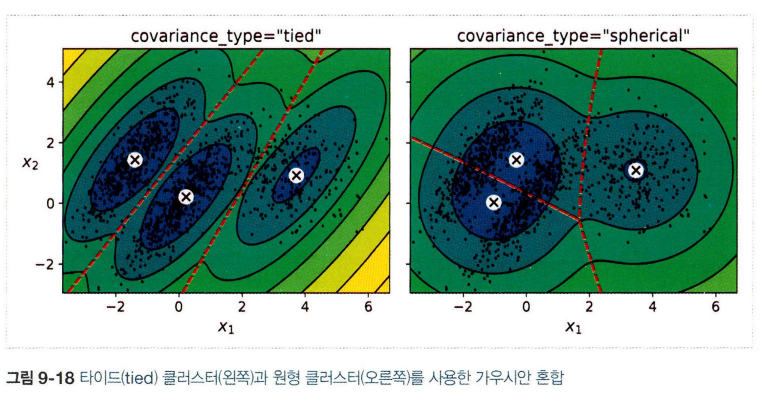

### **9.2.1 가우시안 혼합을 사용한 이상치 탐지**
  - 이상치 탐지
    - 보통과 많이 다른 샘플을 감지하는 작업
    - 부정 거래 감지, 제조 결함이 있는 제품 감지 등에 사용
    - 또는 다른 모델을 훈련하기 전, 데이터셋에서 이상치를 제거하는 데 활용

  - 가우시안 혼합 모델을 이상치 탐지에 사용하는 방법은 매우 간단하다. 
    - 밀도가 낮은 지역에 있는 모든 샘플을 이상치로 볼 수 있다.
    - 그러기 위해 사용할 밀도 임곗값을 정한다.

In [93]:
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

  - 이상치 탐지와 비슷한 작업이 `특이치 탐지`이다. 
  - 그러나 이 알고리즘은 이상치로 오염되지 않은 `깨끗한 데이터셋에서 훈련`한다는 점이 이상치 탐지와 다르다.

### **9.2.2 클러스터 개수 선택하기**
  - k-평균처럼 GaussianMixture 알고리즘은 클러스터의 개수를 지정해야 하는데, 이 값을 어떻게 찾을 수 있을까?
  - `가우시안 혼합`에서는 `BIC`나 `AIC` 같은 이론적 정보 기준을 최소화하는 모델을 찾는다.
$$ BIC = log(m)p - 2log(L)$$
$$ AIC = 2p - 2log(L)$$
      - m : 샘플의 개수
      - p : 모델이 학습할 파라미터의 개수
      - L : 모델의 likelihood function의 최댓값

      - BIC와 AIC의 선택이 다를 경우, BIC가 선택한 모델이 AIC가 선택한 모델보다 간단한 경향이 있다.

  - `가능도 함수` (Likelihood function)
    - 확률 밀도 함수(`PDF`)는 `x에 대한 함수`이며(θ 고정), 가능도 함수(`Likelihood function`)는 `θ에 대한 함수`이다(x 고정).

  - bic()와 aic() 메서드를 사용해 BIC, AIC를 계산한다.

In [95]:
gm.bic(X)

8189.747000497186

In [96]:
gm.aic(X)

8102.521720382148

  - k=3에서 BIC, AIC가 모두 가장 작으므로, k=3이 최선의 선택으로 보인다.

### **9.2.3 베이즈 가우시안 혼합 모델**
  - `BayesianGuassianMixture` 클래스
    - 최적의 클러스터 개수를 수동으로 찾지 않고 `불필요한 클러스터의 가중치를 0`으로 만드는 클래스

In [97]:
from sklearn.mixture import BayesianGaussianMixture
bgm = BayesianGaussianMixture(n_components = 10, n_init = 10)
bgm.fit(X)
np.round(bgm.weights_, 2)

array([0.4 , 0.2 , 0.39, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

  - 알고리즘이 자동으로 3개의 클러스터가 필요하다는 것을 감지했다.

  - 베타 분포 (beta distribution)
    - 고정 범위 안에 놓인 값을 가진 확률 변수를 모델링할 때 자주 사용되는 분포
    - 범위는 0에서 1까지이다.
  
  - SBP (stick-breaking process)
    - 새로운 샘플이 작은 클러스터보다 큰 클러스터에 합류할 가능성이 높은 데이터셋에 잘 맞는 모델

  - 베이즈 가우시안 혼합 모델을 그래프로 나타내면 아래와 같다.

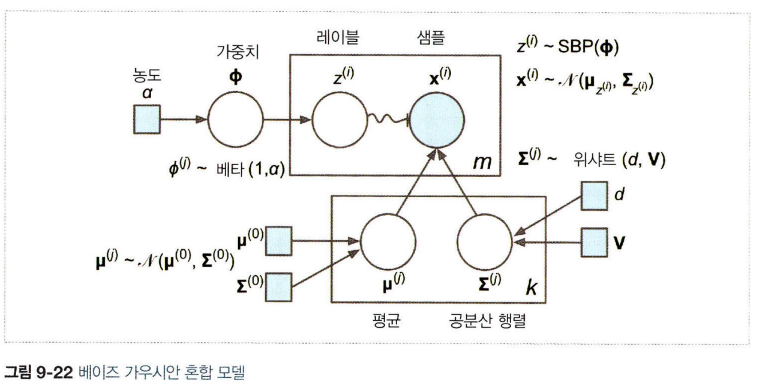 

  - 베이즈 정리
$$p(z|X) = 사후 확률 = \frac{가능도 X 사전 확률}{증거} = \frac{p(X|z)p(z)}{p(X)}$$

  - 증거 p(X)
$$p(X) = ∫p(X|z)p(z)$$
    - p(X)는 가능한 모든 z값에 대해 적분해야 하므로, 계산이 어렵다.
    - 이를 해결하기 위한 방법이 `변분 추론`이다.

  - 가우시안 혼합 모델은 타원형 클러스터에 잘 작동한다.
  - 하지만 아래와 같이 다른 모양을 가진 데이터셋에 훈련하면 나쁜 결과를 얻게 된다.

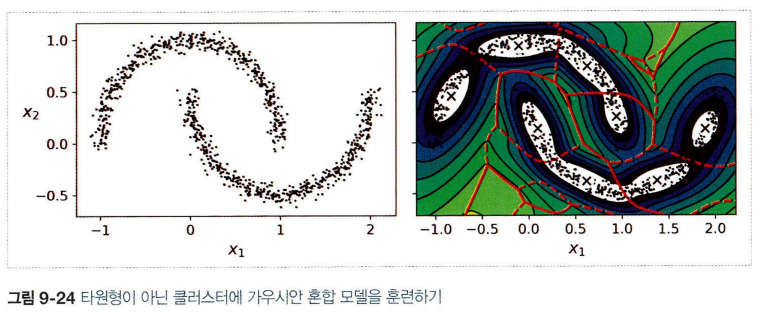


### **9.2.4 이상치 탐지와 특이치 탐지를 위한 다른 알고리즘**

  - 사이킷런에서 이상치 탐지와 특이치 탐지 전용으로 사용할 수 있는 알고리즘
    1. PCA
    2. Fast-MCD
      - 데이터셋을 정제할 때 주로 사용
      - 가우시안 분포의 파라미터를 추정할 때 이상치로 의심되는 샘플을 무시하는데, 이러한 기법은 알고리즘이 타원형을 잘 추정하고 이상치를 잘 구분하도록 돕는다.
    3. 아이솔레이션 포레스트
      - 고차원 데이터셋에서 이상치 감지를 위한 효율적인 알고리즘
    4. LOF(local outlier factor)
      - 주어진 샘플 주위의 밀도와 이웃 주위의 밀도를 비교
    5. one-class SVM
      - 특이치 탐지에 용이
      - 고차원 데이터셋에서 잘 작동하나, 모든 SVM과 마찬가지로 대규모 데이터셋으로의 확장은 어렵다.